In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Treasury Squeeze raw score data.csv')
df

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False
...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,USU96 Comdty,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261,False
896,897,USZ96 Comdty,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000,False
897,898,USH97 Comdty,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741,True
898,899,USM97 Comdty,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070,True


In [6]:
data=df.iloc[:,2:]

In [7]:
data['squeeze']=data['squeeze'].apply(lambda x: 1 if x==True else 0)

In [8]:
X=data.iloc[:,:9]
y=data.loc[:,'squeeze']

In [9]:
X

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio
0,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313
1,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000
2,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676
3,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000
4,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025
...,...,...,...,...,...,...,...,...,...
895,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261
896,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000
897,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741
898,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.20,random_state=42)

In [89]:
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [90]:
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_test_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)

In [93]:
val_score=accuracy_score(y_train_pred,y_train)
test_score=accuracy_score(y_test_pred,y_test)

In [94]:
val_score

0.7069444444444445

In [95]:
test_score

0.6055555555555555

In [96]:
knn.score(X_train, y_train)

0.7069444444444445

In [97]:
knn.score(X_test, y_test)

0.6055555555555555

Calculating for values of K till 30

In [38]:
k_values=np.arange(1,31)

In [39]:
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [70]:
def k_neighbours(k,p):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.25,random_state=42)
    X_scaler = StandardScaler().fit(X_train)
    X_train = X_scaler.transform(X_train)
    X_test = X_scaler.transform(X_test)
    knn=KNeighborsClassifier(n_neighbors=k,p=p,metric='minkowski')
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    y_train_pred=knn.predict(X_train)
    val_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test, y_test)
    return val_score,test_score


In [73]:
test_scores=[]
val_scores=[]
for k in k_values:
    val_score,test_score=k_neighbours(k,1)
    test_scores.append(test_score)
    val_scores.append(val_score)


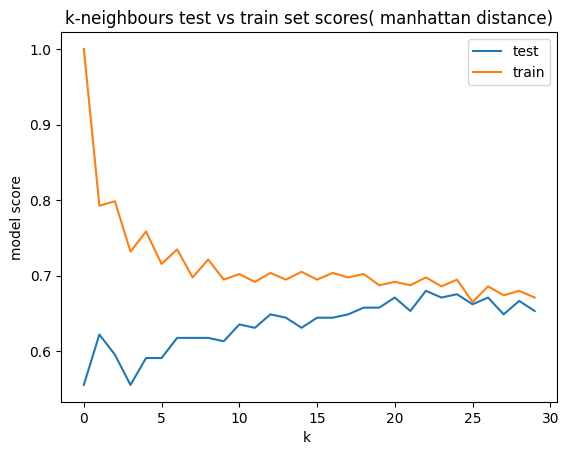

In [80]:
plt.plot(test_scores)
plt.plot(val_scores)
plt.title('k-neighbours test vs train set scores( manhattan distance)')
plt.xlabel("k ")
plt.ylabel('model score')
plt.legend(['test','train'])
plt.show()

In [100]:
manhattan_max=max(test_scores)
opt_k=test_scores.index(manhattan_max)+1
opt_k

23

In [108]:
test_scores[opt_k-10:opt_k]

[0.6444444444444445,
 0.6311111111111111,
 0.6444444444444445,
 0.6444444444444445,
 0.6488888888888888,
 0.6577777777777778,
 0.6577777777777778,
 0.6711111111111111,
 0.6533333333333333,
 0.68]

Taking Manhattan Distance as parameter and looking the graph we get k as 23
to avoid overfitting and observing that there's not significant improvement in accuracy with increase in k we can take a k of 21 as well 

In [84]:
test_scores_=[]
val_scores_=[]
for k in k_values:
    val_score,test_score=k_neighbours(k,2)
    test_scores_.append(test_score)
    val_scores_.append(val_score)



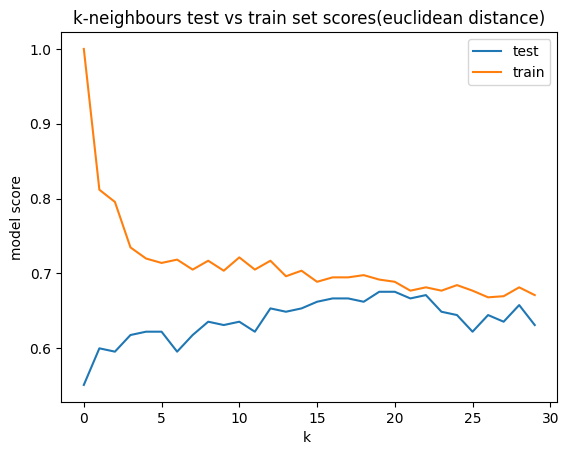

In [86]:
plt.plot(test_scores_)
plt.plot(val_scores_)
plt.title('k-neighbours test vs train set scores(euclidean distance)')
plt.xlabel("k ")
plt.ylabel('model score')
plt.legend(['test','train'])
plt.show()


In [111]:
euclidean_max=max(test_scores_)
opt_k_=test_scores_.index(euclidean_max)+1
opt_k_

20

In [112]:
test_scores[opt_k_-10:opt_k_]

[0.6355555555555555,
 0.6311111111111111,
 0.6488888888888888,
 0.6444444444444445,
 0.6311111111111111,
 0.6444444444444445,
 0.6444444444444445,
 0.6488888888888888,
 0.6577777777777778,
 0.6577777777777778]

Taking Euclidean Distance as parameter and looking the graph we get k as 20
to avoid overfitting and observing that there's not significant improvement in accuracy with increase in k we can take a k of 13 as well.

In [114]:
print("My name is Samanvay Malapally Sudhakara")
print("My NetID is: sm105")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
      

My name is Samanvay Malapally Sudhakara
My NetID is: sm105
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
